## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import tqdm
from pprint import pprint

# Add local `core` module to path
sys.path.insert(0, '../../')

import gym

from core import utilities
from core.learn.imitation.agents import ImitationAgent
from core.learn.imitation.models import NeuralNetwork
from core.run import run_imitation

In [2]:
def get_model_agent():
    """ Return an untrained model and agent.  """
    
    model = NeuralNetwork(
            input_shape=env.observation_space.shape,
            output_shape=env.action_space.n,
            learning_rate=0.00025,
            use_cnn=False,
            cnn_number_of_maps=(32, 16),
            cnn_kernel_size=(4, 2),
            cnn_kernel_stride=(2, 1),
            mlp_n_hidden=(),
            mlp_activation_f="tanh",
            mlp_value_n_hidden=(32, 32, 64),
            mlp_value_activation_f="tanh",
            output_activation_f='softmax',
    )

    agent = ImitationAgent(
            env=env,
            model=model,
            nr_games=50,
            minimal_score=100,
            progressbar=True,
            action_func=None,
            ipython=True, # Improves printing of training.
    )
    return model, agent

    

## CartPole

#### Settings

In [3]:
env: gym.Env = gym.make('CartPole-v0')
model, agent = get_model_agent()

#### Experiments

In [4]:
# Note that the training is performed in the `run_imitation` if the agents isn't trained yet.
# The history object corresponds to the evaluation data
history, training = run_imitation(
        env=env,
        agent=agent,
        runs=100,
        plot_stats=None,
        plot_period=50,
        fit_kwargs=dict(epochs=20),
        ipython=True,
)

	Training           :   0%|          | 0/20 [00:00<?, ?epoch/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
utilities.describe_history(history, columns=['score'])
utilities.plot_history(training.history, columns=['loss'])


       count    mean       std    min    25%    50%    75%    max
score  100.0  197.43  8.425856  160.0  200.0  200.0  200.0  200.0



### Saving and loading

In [6]:
agent.save_model(os.path.join('models', env.spec.id))
del model, agent

INFO:tensorflow:Assets written to: models\CartPole-v0\weights.tf\assets


In [7]:
# Load new network and agent
model, agent = get_model_agent()
agent.load_model(os.path.join('models', env.spec.id))

loaded


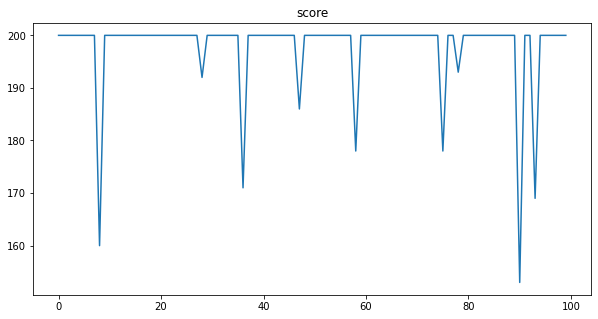

In [8]:
# Note that the trianing is performed in the `run_imitation` if the agents isn't trained yet.
# The history object corresponds to the evaluation data
history, training = run_imitation(
        env=env,
        agent=agent,
        runs=100,
        plot_stats=['score'],
        plot_period=5,
        fit_kwargs=dict(epochs=20),
        ipython=True,  # Is required, otherwise plot stats are not updated.
)

In [9]:
# Possible plot stats.
pprint(list(history.keys()))

['score', 'steps_per_game', 'framerate', 'total_episodes', 'total_steps']
